In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [18]:
orig_df = pd.read_csv("all_province_nt.csv")
orig_df.head()

,Unnamed: 0,Format1,Format2,Format3,Format4,Format5,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply",...,Information and communication,Financial and insurance activities,Real estate activities,"Professional, scientific and technical activities",Administrative and support service activities,Public administration and defence; compulsory social security,Education,Human health activities,"Arts, entertainment and recreation",Other service activities
0,KHON KAEN_2017,5,5,3,4,4,21756.881220,942.649643,70698.773470,2810.195996,...,1308.849500,12537,6989,188,671,7808,23789,7647.101474,374.020223,1532.568698
1,UDON THANI_2017,4,5,3,3,4,19547.565500,3864.499443,15094.455070,1497.257873,...,1155.625497,8968,5494,58,917,7076,13664,3824.106741,209.048201,1474.872280
2,LOEI_2017,2,2,2,2,1,14607.772200,1374.974875,7414.508306,511.967948,...,351.060659,3185,2151,25,115,2757,6774,1660.602424,280.901522,461.275975
3,NONG KHAI_2017,2,2,2,1,2,9672.210913,304.253479,6481.553819,460.372919,...,367.860144,2954,1595,16,137,1720,4770,1449.286039,85.798449,641.521886
4,MUKDAHAN_2017,1,1,2,1,1,7011.492098,91.729459,3191.207522,309.202490,...,157.148340,1801,2064,65,62,1082,2730,913.206142,59.698906,228.908060


In [19]:
dummy_df = orig_df.drop(['Unnamed: 0'], axis=1)
dummy_df

,Format1,Format2,Format3,Format4,Format5,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",...,Information and communication,Financial and insurance activities,Real estate activities,"Professional, scientific and technical activities",Administrative and support service activities,Public administration and defence; compulsory social security,Education,Human health activities,"Arts, entertainment and recreation",Other service activities
0,5,5,3,4,4,21756.881220,942.649643,70698.773470,2810.195996,845,...,1308.849500,12537,6989,188,671,7808,23789,7647.101474,374.020223,1532.568698
1,4,5,3,3,4,19547.565500,3864.499443,15094.455070,1497.257873,561,...,1155.625497,8968,5494,58,917,7076,13664,3824.106741,209.048201,1474.872280
2,2,2,2,2,1,14607.772200,1374.974875,7414.508306,511.967948,186,...,351.060659,3185,2151,25,115,2757,6774,1660.602424,280.901522,461.275975
3,2,2,2,1,2,9672.210913,304.253479,6481.553819,460.372919,111,...,367.860144,2954,1595,16,137,1720,4770,1449.286039,85.798449,641.521886
4,1,1,2,1,1,7011.492098,91.729459,3191.207522,309.202490,133,...,157.148340,1801,2064,65,62,1082,2730,913.206142,59.698906,228.908060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,5,5,2,5,4,2992.031993,7.878722,291876.560800,15972.097790,2537,...,4546.785332,25565,14336,5647,22624,10040,4104,8766.355076,628.340130,12979.793240
227,5,6,2,4,4,5789.250519,132.666192,185025.287000,9545.870133,2427,...,3582.759627,15290,12924,2346,4983,6266,11269,5680.390849,959.164189,3066.806726
228,4,5,2,4,4,14103.585590,764.224076,236940.839100,8386.459823,2703,...,2155.632589,8511,5781,604,2492,4152,1689,4500.496163,541.003137,1279.988702
229,4,5,2,4,3,21312.922530,2119.227800,167758.182400,4636.181046,1294,...,1936.229475,11159,4987,1438,793,6297,30828,3820.244886,414.781443,1338.609211


In [20]:
orig_df.shape

(231, 25)

In [21]:
orig_df.dtypes

Unnamed: 0                                                              object
Format1                                                                  int64
Format2                                                                  int64
Format3                                                                  int64
Format4                                                                  int64
Format5                                                                  int64
Agriculture, forestry and fishing                                      float64
Mining and quarrying                                                   float64
Manufacturing                                                          float64
Electricity, gas, steam and air conditioning supply                    float64
Water supply; sewerage, waste management and remediation activities      int64
Construction                                                             int64
Wholesale and retail trade and repair of motor vehic

# Format 2

In [22]:
dummy_df.columns

Index(['Format1', 'Format2', 'Format3', 'Format4', 'Format5',
       'Agriculture, forestry and fishing', 'Mining and quarrying',
       'Manufacturing', 'Electricity, gas, steam and air conditioning supply',
       'Water supply; sewerage, waste management and remediation activities',
       'Construction',
       'Wholesale and retail trade and repair of motor vehicles',
       'Transportation and storage',
       'Accommodation and food service activities',
       'Information and communication', 'Financial and insurance activities',
       'Real estate activities',
       'Professional, scientific and technical activities',
       'Administrative and support service activities',
       'Public administration and defence; compulsory social security',
       'Education', 'Human health activities',
       'Arts, entertainment and recreation', 'Other service activities'],
      dtype='object')

In [23]:
input_vars = [ 
       'Agriculture, forestry and fishing', 'Mining and quarrying',
       'Manufacturing', 'Electricity, gas, steam and air conditioning supply',
       'Water supply; sewerage, waste management and remediation activities',
       'Construction',
       'Wholesale and retail trade and repair of motor vehicles',
       'Transportation and storage',
       'Accommodation and food service activities',
       'Information and communication', 'Financial and insurance activities',
       'Real estate activities',
       'Professional, scientific and technical activities',
       'Administrative and support service activities',
       'Public administration and defence; compulsory social security',
       'Education', 'Human health activities',
       'Arts, entertainment and recreation', 'Other service activities']
len(input_vars)

19

In [24]:
for_df = dummy_df.drop(['Format1', 'Format3', 'Format4', 'Format5'], axis=1)

In [25]:
for_df

,Format2,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,Financial and insurance activities,Real estate activities,"Professional, scientific and technical activities",Administrative and support service activities,Public administration and defence; compulsory social security,Education,Human health activities,"Arts, entertainment and recreation",Other service activities
0,5,21756.881220,942.649643,70698.773470,2810.195996,845,6938,26120,4738.765166,4122.576421,1308.849500,12537,6989,188,671,7808,23789,7647.101474,374.020223,1532.568698
1,5,19547.565500,3864.499443,15094.455070,1497.257873,561,4566,16201,3576.283013,1635.303048,1155.625497,8968,5494,58,917,7076,13664,3824.106741,209.048201,1474.872280
2,2,14607.772200,1374.974875,7414.508306,511.967948,186,2104,6740,950.698488,701.816776,351.060659,3185,2151,25,115,2757,6774,1660.602424,280.901522,461.275975
3,2,9672.210913,304.253479,6481.553819,460.372919,111,1485,4945,2614.814843,277.762462,367.860144,2954,1595,16,137,1720,4770,1449.286039,85.798449,641.521886
4,1,7011.492098,91.729459,3191.207522,309.202490,133,1153,4074,633.688414,279.075555,157.148340,1801,2064,65,62,1082,2730,913.206142,59.698906,228.908060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,5,2992.031993,7.878722,291876.560800,15972.097790,2537,10409,97576,163458.489300,9021.095235,4546.785332,25565,14336,5647,22624,10040,4104,8766.355076,628.340130,12979.793240
227,6,5789.250519,132.666192,185025.287000,9545.870133,2427,11901,53144,8397.959586,4184.691582,3582.759627,15290,12924,2346,4983,6266,11269,5680.390849,959.164189,3066.806726
228,5,14103.585590,764.224076,236940.839100,8386.459823,2703,7267,47602,5137.330759,680.838000,2155.632589,8511,5781,604,2492,4152,1689,4500.496163,541.003137,1279.988702
229,5,21312.922530,2119.227800,167758.182400,4636.181046,1294,10547,37786,6780.495583,1493.955135,1936.229475,11159,4987,1438,793,6297,30828,3820.244886,414.781443,1338.609211


In [28]:
df = for_df.dropna()
X = df[input_vars]
y = df.Format2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, shuffle=False)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[0.8958947073017396, 0.6689315834672981]

In [29]:
X_train

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,Financial and insurance activities,Real estate activities,"Professional, scientific and technical activities",Administrative and support service activities,Public administration and defence; compulsory social security,Education,Human health activities,"Arts, entertainment and recreation",Other service activities
0,21756.881220,942.649643,70698.773470,2810.195996,845,6938,26120,4738.765166,4122.576421,1308.849500,12537,6989,188,671,7808,23789,7647.101474,374.020223,1532.568698
1,19547.565500,3864.499443,15094.455070,1497.257873,561,4566,16201,3576.283013,1635.303048,1155.625497,8968,5494,58,917,7076,13664,3824.106741,209.048201,1474.872280
2,14607.772200,1374.974875,7414.508306,511.967948,186,2104,6740,950.698488,701.816776,351.060659,3185,2151,25,115,2757,6774,1660.602424,280.901522,461.275975
3,9672.210913,304.253479,6481.553819,460.372919,111,1485,4945,2614.814843,277.762462,367.860144,2954,1595,16,137,1720,4770,1449.286039,85.798449,641.521886
4,7011.492098,91.729459,3191.207522,309.202490,133,1153,4074,633.688414,279.075555,157.148340,1801,2064,65,62,1082,2730,913.206142,59.698906,228.908060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,4386.447353,7.327084,331084.633900,16133.253710,2718,11138,124765,171882.830400,12134.702860,5714.933973,27221,17418,6638,23914,12044,4064,9855.501516,1013.841364,14003.620030
150,6688.984576,117.614962,203401.070700,9683.194219,2592,11482,72533,10045.232490,5312.498068,4327.495627,15998,17664,3015,5437,8146,15834,6618.582042,1134.751042,3767.433667
151,7717.852946,557.403352,280166.588200,7826.506622,2374,7559,59175,5700.903094,827.078014,2448.531520,9387,6306,687,2043,4841,1667,5204.817855,541.177879,1216.225688
152,21188.246620,2137.638599,190440.952600,4383.369712,1548,10368,45203,7889.646126,1896.368037,2527.129562,12077,6459,1521,803,7356,27215,4374.833967,550.476413,1125.926041


In [30]:
X_test

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,Financial and insurance activities,Real estate activities,"Professional, scientific and technical activities",Administrative and support service activities,Public administration and defence; compulsory social security,Education,Human health activities,"Arts, entertainment and recreation",Other service activities
154,20935.090040,1206.373717,68848.554780,2746.279637,765,7271,24525,5113.690205,3499.423513,1196.099541,12072,6316,185,623,7691,23140,7187.121854,325.450175,1530.359405
155,18152.075400,6211.990349,14403.956680,1446.947377,495,4787,14378,3288.299527,1402.792162,937.909456,8839,4424,68,796,6823,13399,3633.803053,177.048429,1369.255841
156,13253.341290,1084.257727,5738.331029,510.443508,150,1960,5995,818.542586,620.611510,291.752749,3019,1775,18,108,2688,6482,1594.808064,237.218966,425.127118
157,9377.362409,177.441005,6145.417423,439.440877,112,1661,4779,2705.046582,261.883467,363.492487,2862,1505,13,149,1677,4587,1381.981532,72.294649,619.060097
158,6535.465990,135.829909,3329.313682,303.240067,106,1200,3366,542.375373,249.025557,138.529347,1703,1036,24,57,1034,2725,871.339373,50.260448,229.224879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,2992.031993,7.878722,291876.560800,15972.097790,2537,10409,97576,163458.489300,9021.095235,4546.785332,25565,14336,5647,22624,10040,4104,8766.355076,628.340130,12979.793240
227,5789.250519,132.666192,185025.287000,9545.870133,2427,11901,53144,8397.959586,4184.691582,3582.759627,15290,12924,2346,4983,6266,11269,5680.390849,959.164189,3066.806726
228,14103.585590,764.224076,236940.839100,8386.459823,2703,7267,47602,5137.330759,680.838000,2155.632589,8511,5781,604,2492,4152,1689,4500.496163,541.003137,1279.988702
229,21312.922530,2119.227800,167758.182400,4636.181046,1294,10547,37786,6780.495583,1493.955135,1936.229475,11159,4987,1438,793,6297,30828,3820.244886,414.781443,1338.609211


## Recursive

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X = df[input_vars]
y = df['Format2']
n_features = 7  # define by yourself to select important features

rfe = RFE(LinearRegression(), n_features)
model = rfe.fit(X, y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [52]:
model.ranking_

array([11, 12, 10,  8,  1,  1,  1, 13,  3,  5,  4,  1,  7,  2,  9,  6,  1,
        1,  1])

In [53]:
model.estimator_.coef_

array([-1.26168934e-04,  1.73524592e-04,  1.76688002e-05,  1.46686886e-04,
        1.83942573e-04, -4.32742017e-04, -2.49592113e-04])

In [54]:
updated_vars = []
for i in range(0,len(input_vars)-1):
    if model.ranking_[i] == 1:
        updated_vars.append(df[input_vars].columns[i])
updated_vars

['Water supply; sewerage, waste management and remediation activities',
 'Construction',
 'Wholesale and retail trade and repair of motor vehicles',
 'Real estate activities',
 'Human health activities',
 'Arts, entertainment and recreation']

## L1

In [55]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[0.8958947073017396, 0.6689315834672981]

In [56]:
from sklearn.linear_model import Lasso

## Perform regresssion with embedded lasso 
## set alpha (weight of penalty term) = 1

lasso = Lasso(alpha=0.001)
model = lasso.fit(X_train, y_train)
y_pred = model.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51.85642802135079, tolerance: 0.03733506493506494
  model = cd_fast.enet_coordinate_descent(


[0.8903107273805069, 0.6730457234484948]

In [57]:
[model.coef_, model.intercept_]

[array([ 1.93523468e-06, -1.66978552e-06, -4.69489833e-06, -1.31491243e-05,
         1.67502418e-04,  1.66661451e-04,  3.15353979e-05,  8.75019287e-06,
         2.19668237e-05, -1.50521058e-04, -1.06276934e-05,  1.44717305e-04,
         8.81239016e-05, -1.68041316e-04,  1.67183813e-06, -9.81312166e-06,
         2.26886220e-04, -3.81743118e-04, -1.30403047e-04]),
 1.082352069018452]

In [58]:
index = np.argsort(model.coef_)
coef = [model.coef_[index[i]] for i in range(len(model.coef_))  if model.coef_[index[i]] != 0]
update_vars = [input_vars[index[i]] for i in range(len(model.coef_))  if model.coef_[index[i]] != 0]
coef

[-0.0003817431180568591,
 -0.00016804131611155085,
 -0.00015052105770722846,
 -0.00013040304660159223,
 -1.3149124279467879e-05,
 -1.0627693429337393e-05,
 -9.813121659713585e-06,
 -4.694898329449285e-06,
 -1.669785517161991e-06,
 1.6718381300612774e-06,
 1.9352346768733495e-06,
 8.7501928663241e-06,
 2.1966823703217917e-05,
 3.1535397903987525e-05,
 8.812390157406666e-05,
 0.000144717305162033,
 0.00016666145148270953,
 0.00016750241786061063,
 0.00022688622015476238]

In [59]:
update_vars

['Arts, entertainment and recreation',
 'Administrative and support service activities',
 'Information and communication',
 'Other service activities',
 'Electricity, gas, steam and air conditioning supply',
 'Financial and insurance activities',
 'Education',
 'Manufacturing',
 'Mining and quarrying',
 'Public administration and defence; compulsory social security',
 'Agriculture, forestry and fishing',
 'Transportation and storage',
 'Accommodation and food service activities',
 'Wholesale and retail trade and repair of motor vehicles',
 'Professional, scientific and technical activities',
 'Real estate activities',
 'Construction',
 'Water supply; sewerage, waste management and remediation activities',
 'Human health activities']

## Random Forest

In [60]:
df = dummy_df.copy()
df = df.dropna()

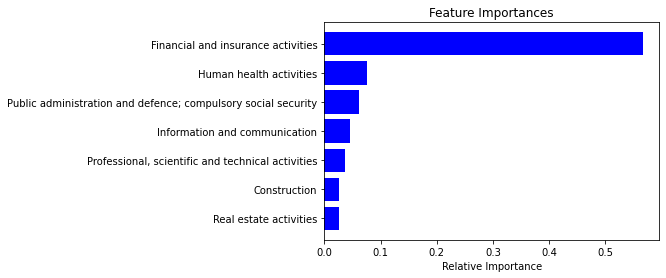

In [62]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=10,n_estimators=100)
model.fit(df[input_vars],df.Format2)

n_features = 7

# Plot feature importance
features = df[input_vars].columns
importances = model.feature_importances_
indices = np.argsort(importances)[-n_features:]  # sort top n features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


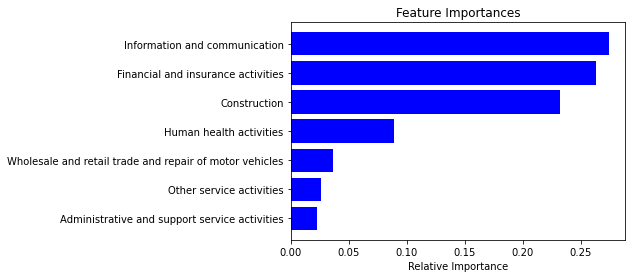

In [63]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=10,n_estimators=100)
model.fit(df[input_vars],df.Format1)

n_features = 7

# Plot feature importance
features = df[input_vars].columns
importances = model.feature_importances_
indices = np.argsort(importances)[-n_features:]  # sort top n features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


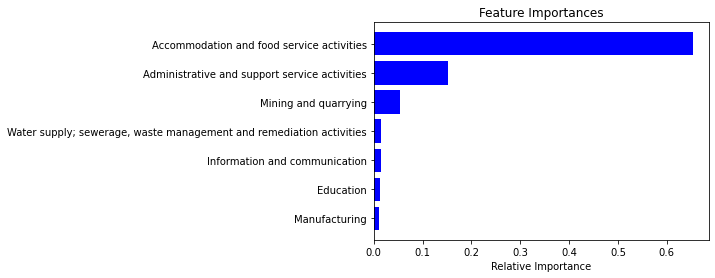

In [64]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=10,n_estimators=100)
model.fit(df[input_vars],df.Format3)

n_features = 7

# Plot feature importance
features = df[input_vars].columns
importances = model.feature_importances_
indices = np.argsort(importances)[-n_features:]  # sort top n features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


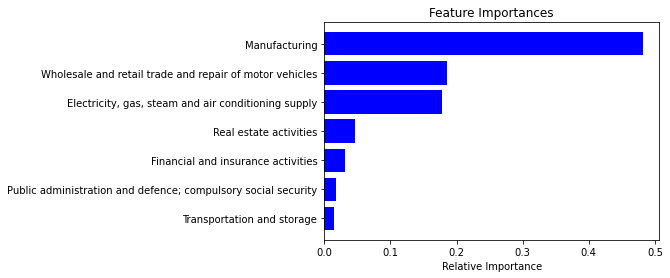

In [65]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=10,n_estimators=100)
model.fit(df[input_vars],df.Format4)

n_features = 7

# Plot feature importance
features = df[input_vars].columns
importances = model.feature_importances_
indices = np.argsort(importances)[-n_features:]  # sort top n features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


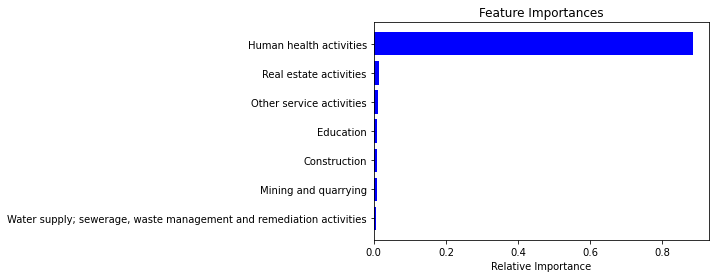

In [67]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=10,n_estimators=100)
model.fit(df[input_vars],df.Format5)

n_features = 7

# Plot feature importance
features = df[input_vars].columns
importances = model.feature_importances_
indices = np.argsort(importances)[-n_features:]  # sort top n features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
